In [163]:
#import standard data sci libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ! pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [164]:
df = pd.read_csv('Telangana.csv')

In [165]:
df.columns

Index(['To Date', 'Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5', 'State',
       'City', 'Station', 'AQI', 'AQI Category'],
      dtype='object')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   To Date       8760 non-null   object 
 1   Ozone         6130 non-null   float64
 2   CO            6124 non-null   float64
 3   SO2           6138 non-null   float64
 4   NO2           6141 non-null   float64
 5   PM10          6104 non-null   float64
 6   PM2.5         6103 non-null   float64
 7   State         8760 non-null   object 
 8   City          8760 non-null   object 
 9   Station       8760 non-null   object 
 10  AQI           6153 non-null   float64
 11  AQI Category  6153 non-null   object 
dtypes: float64(7), object(5)
memory usage: 821.4+ KB


In [167]:
df.isnull().sum()

To Date            0
Ozone           2630
CO              2636
SO2             2622
NO2             2619
PM10            2656
PM2.5           2657
State              0
City               0
Station            0
AQI             2607
AQI Category    2607
dtype: int64

In [168]:
df.describe()

,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI
count,6130.000000,6124.000000,6138.000000,6141.000000,6104.000000,6103.000000,6153.000000
mean,20.114829,0.674891,8.254451,15.515050,78.131186,36.535981,80.375752
std,16.904719,0.396751,6.403741,14.854748,39.010211,18.844151,36.695544
min,0.400000,0.000000,0.150000,0.170000,4.470000,0.840000,8.000000
25%,12.620000,0.430000,4.610000,5.360000,48.350000,22.370000,52.000000
50%,16.350000,0.620000,6.450000,8.570000,71.200000,33.820000,74.000000
75%,21.510000,0.810000,9.720000,22.360000,100.217500,47.925000,103.000000
max,181.700000,7.030000,69.520000,123.810000,242.260000,113.530000,278.000000


In [185]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)


# The format "%d-%m-%Y %H:%M" specifies: Day-Month-Year Hour:Minute
# df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')
df.head()

['to_date', 'ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5', 'state', 'city', 'station', 'aqi', 'aqi_category']
Index(['to_date', 'ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5', 'state',
       'city', 'station', 'aqi', 'aqi_category'],
      dtype='object')


,to_date,ozone,co,so2,no2,pm10,pm2.5,state,city,station,aqi,aqi_category
0,02-08-2021 00:00,10.73,0.80,7.68,59.17,35.24,9.76,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",74.0,Moderate
1,03-08-2021 00:00,7.80,0.12,7.86,37.23,59.63,18.54,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",60.0,Moderate
2,04-08-2021 00:00,11.32,0.33,15.62,15.85,64.41,21.17,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",64.0,Moderate
3,05-08-2021 00:00,7.03,0.29,19.49,13.93,45.94,12.65,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",46.0,Good
4,06-08-2021 00:00,7.12,0.29,23.43,15.69,56.57,16.21,Telangana,Hyderabad,"Bollaram Industrial Area, Hyderabad - TSPCB",57.0,Moderate


In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
PM2.5,2657,30.300000
PM10,2656,30.300000
CO,2636,30.100000
Ozone,2630,30.000000
SO2,2622,29.900000
NO2,2619,29.900000


In [ ]:
city_day = df.copy()

In [ ]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

In [ ]:
pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']


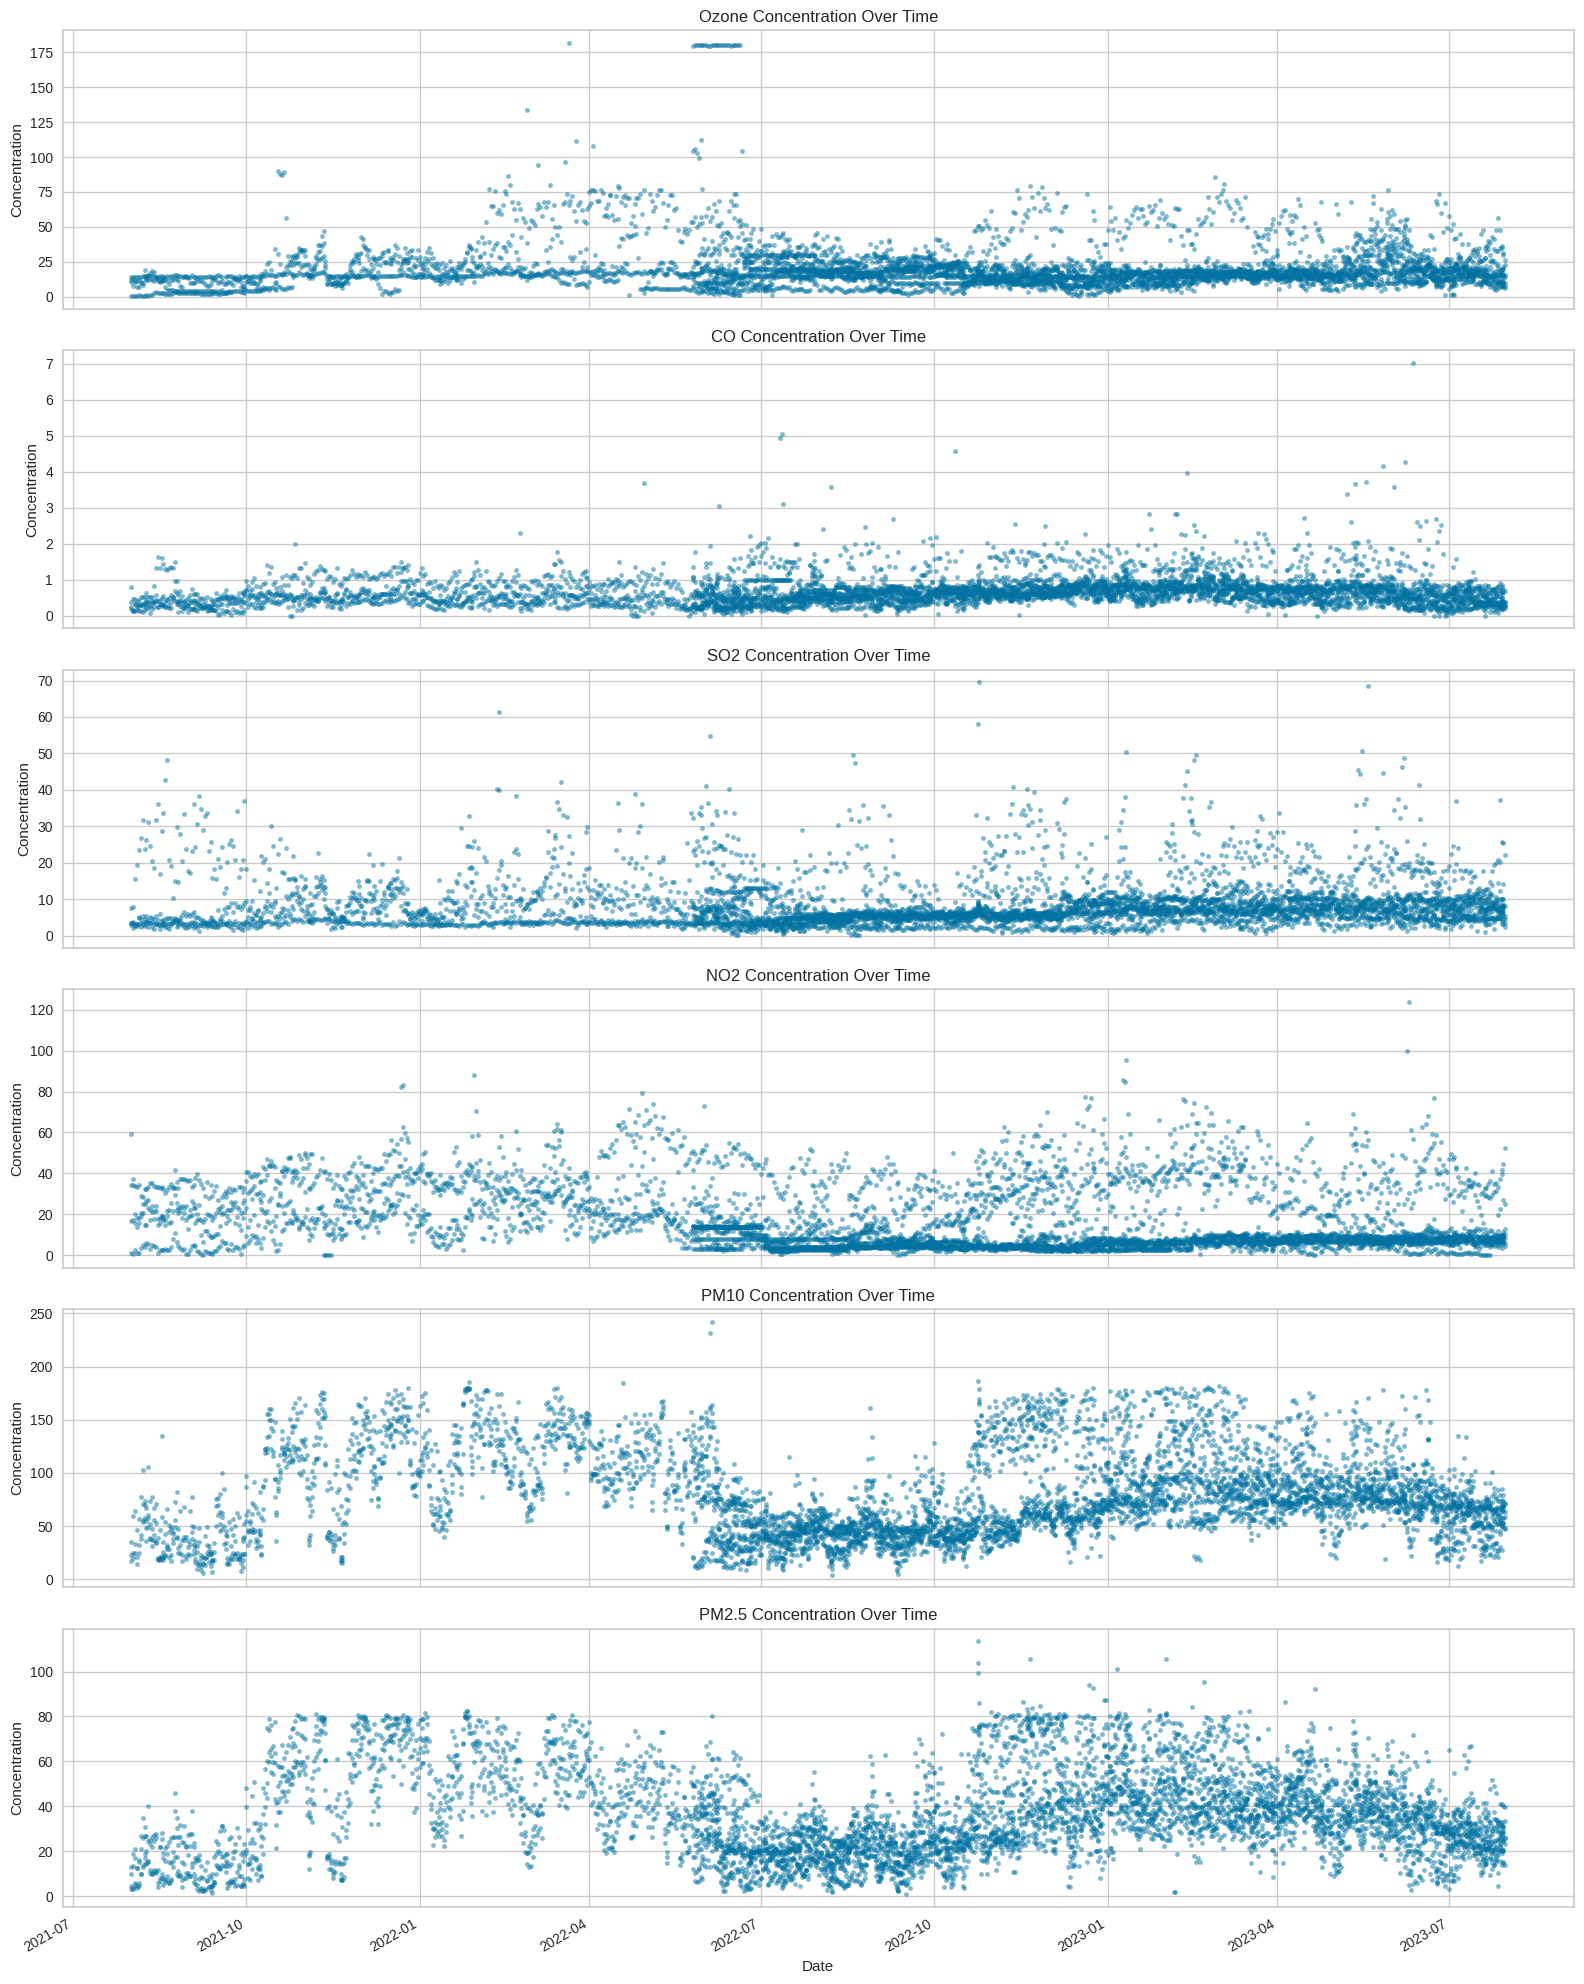

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. RELOAD THE DATA to ensure the column exists
df = pd.read_csv("Telangana.csv")

df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')

df.set_index('From Date', inplace=True)

# 5. PLOTTING
fig, axes = plt.subplots(len(pollutants), 1, figsize=(16, 20), sharex=True)

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(
        ax=axes[i],
        marker='.', 
        alpha=0.5, 
        linestyle='None',
        title=f'{pollutant} Concentration Over Time'
    )
    
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration') 

plt.tight_layout()
plt.show()

In [ ]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
# def display_side_by_side(*args):
#     html_str=''
#     for df in args:
#         html_str+=df.render()
#     display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def display_side_by_side(*args):
    """
    Displays Pandas Styler objects side-by-side by converting them to HTML.
    """
    html_str = ''
    
    # *** CHANGE THIS LINE ***
    for df in args:
        html_str += df.to_html() # Use .to_html() instead of .render()
        
    # The replacement is to ensure the tables are displayed inline, not stacked.
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
# pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']

pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
ozone = max_polluted_city('Ozone')


display_side_by_side(pm2_5, pm10, no2, so2, co, ozone)

,City,PM2.5
0,Hyderabad,36.540000
,City,PM10
0,Hyderabad,78.130000
,City,NO2
0,Hyderabad,15.520000
,City,SO2
0,Hyderabad,8.250000
,City,CO
0,Hyderabad,0.670000
,City,Ozone


In [ ]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['Ozone']=df1['Ozone'].fillna((df1['Ozone'].median()))


In [ ]:
df1['City'].value_counts()

City
Hyderabad    8760
Name: count, dtype: int64

In [ ]:
df1['Pollution content'] = df1['PM2.5']+df1['PM10']+df1['NO2']+df1['CO']+df1['SO2']+df1['Ozone']

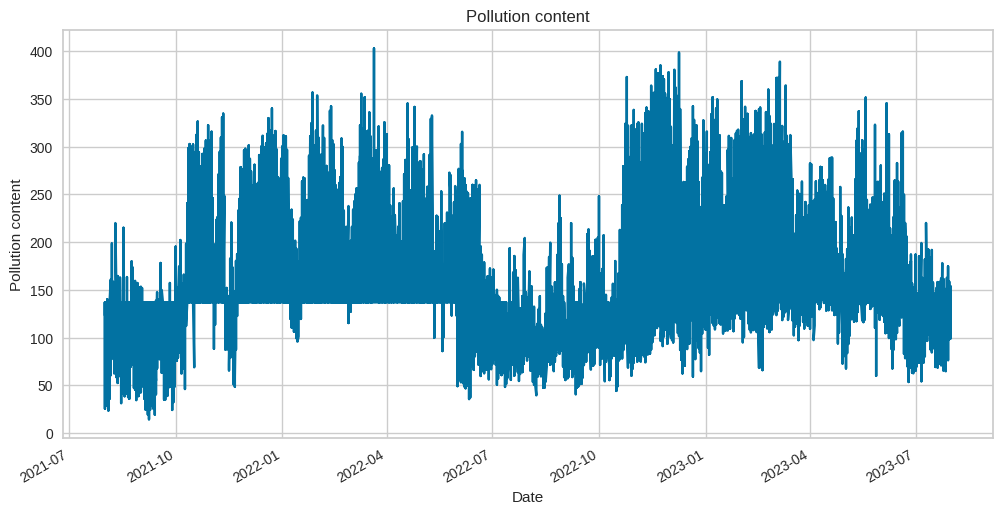

In [ ]:
import matplotlib.pyplot as plt

def ploting(var):
    # Correction: Replace the problematic iplot call with standard pandas.plot(),
    # which uses matplotlib for stability.
    ax = df1[var].plot(figsize=(12, 6), title=var)
    
    # Set labels using the standard matplotlib Axis methods
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    plt.grid(True)
    plt.show()

ploting('Pollution content')

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Load Data (If not already loaded) ---
# df = pd.read_csv('Telangana.csv') 
# Make sure your DataFrame 'df' is loaded before running the following code.
# The code below renames columns to be consistent with the AQI logic if needed.

# --- 2. Define NAQI Breakpoints ---
# Breakpoints for NAQI (National Air Quality Index - India)
# Units for all concentrations (C) are $\mu\text{g}/\text{m}^3$ except CO which is $\text{mg}/\text{m}^3$.
breakpoints = {
    # (I_Lo, I_Hi, B_Lo, B_Hi) -> (AQI Low, AQI High, Conc Low, Conc High)
    'PM2.5': [(0, 50, 0, 30), (51, 100, 31, 60), (101, 200, 61, 90), (201, 300, 91, 120), (301, 400, 121, 250), (401, 500, 251, 500)],
    'PM10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 250), (201, 300, 251, 350), (301, 400, 351, 430), (401, 500, 431, 500)],
    'NO2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 180), (201, 300, 181, 280), (301, 400, 281, 400), (401, 500, 401, 500)],
    'Ozone': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 200, 101, 168), (201, 300, 169, 208), (301, 400, 209, 748), (401, 500, 749, 1000)],
    'CO': [(0, 50, 0, 1.0), (51, 100, 1.1, 2.0), (101, 200, 2.1, 10), (201, 300, 10.1, 17), (301, 400, 17.1, 34), (401, 500, 34.1, 50)], # mg/m^3
    'SO2': [(0, 50, 0, 40), (51, 100, 41, 80), (101, 200, 81, 380), (201, 300, 381, 800), (301, 400, 801, 1600), (401, 500, 1601, 2000)]
}

# --- 3. Define Helper Functions ---

def get_aqi_sub_index(C, pollutant):
    """Calculates the AQI sub-index for a single pollutant concentration C using linear interpolation."""
    if pd.isna(C) or C < 0:
        return np.nan

    for I_Lo, I_Hi, B_Lo, B_Hi in breakpoints[pollutant]:
        if C >= B_Lo and C <= B_Hi:
            # Linear interpolation formula: I = [(I_Hi - I_Lo) / (B_Hi - B_Lo)] * (C - B_Lo) + I_Lo
            if B_Hi == B_Lo:
                return I_Lo
            else:
                return round(((I_Hi - I_Lo) / (B_Hi - B_Lo)) * (C - B_Lo) + I_Lo)
    
    # If concentration is above the highest breakpoint, cap at 500
    if C > breakpoints[pollutant][-1][3]:
        return 500 
    
    return np.nan

def calculate_aqi(row):
    """Calculates the overall AQI (maximum of all sub-indices)."""
    # List of sub-indices for the available pollutants
    sub_indices = [
        get_aqi_sub_index(row['PM2.5'], 'PM2.5'),
        get_aqi_sub_index(row['PM10'], 'PM10'),
        get_aqi_sub_index(row['NO2'], 'NO2'),
        get_aqi_sub_index(row['Ozone'], 'Ozone'),
        get_aqi_sub_index(row['CO'], 'CO'),
        get_aqi_sub_index(row['SO2'], 'SO2')
    ]
    
    # The overall AQI is the maximum of the sub-indices (NAQI standard)
    return np.nanmax(sub_indices) if any(~np.isnan(sub_indices)) else np.nan

def get_aqi_category(aqi):
    """Assigns the AQI category based on the user's requested labels ('Good', 'Moderate', 'Severe')."""
    if pd.isna(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 200:
        return 'Moderate' # Combines Satisfactory and Moderately Polluted
    else:
        return 'Severe' # Combines Poor, Very Poor, and Severe

# --- 4. Apply Functions to DataFrame ---

# Rename columns to match the breakpoints keys (assuming standard names in your CSV)
# You can comment this out if your column names are already 'PM2.5', 'PM10', etc.
df.rename(columns={'PM2.5': 'PM2.5', 'PM10': 'PM10', 'Ozone': 'Ozone',
                   'CO': 'CO', 'SO2': 'SO2', 'NO2': 'NO2'}, inplace=True)

# Calculate the AQI for each row
df['AQI'] = df.apply(calculate_aqi, axis=1)

# Assign the AQI category
df['AQI Category'] = df['AQI'].apply(get_aqi_category)

# --- 5. Display and Save (Optional) ---

print(df[['PM2.5', 'PM10', 'AQI', 'AQI Category']].head())

# If you want to save the updated DataFrame for your EDA report:
df.to_csv('Telangana.csv', index=False)

            PM2.5   PM10   AQI AQI Category
From Date                                  
2021-08-01   9.76  35.24  74.0     Moderate
2021-08-02  18.54  59.63  60.0     Moderate
2021-08-03  21.17  64.41  64.0     Moderate
2021-08-04  12.65  45.94  46.0         Good
2021-08-05  16.21  56.57  57.0     Moderate


In [ ]:
import pandas_profiling

In [170]:
data = pd.read_csv("Telangana.csv")

In [194]:
import pandas as pd
from pandas_profiling import ProfileReport # Or ydata_profiling

# --- 1. Load Data ---
# Use the file you need (either the original or the one with AQI)
data = pd.read_csv('Telangana.csv') 

# --- 2. CRITICAL FIX: Clean Column Names ---
# This removes any hidden spaces or special characters around column names
data.columns = data.columns.str.strip() 

try:
    data['From Date'] = pd.to_datetime(data['From Date'], format='%d-%m-%Y %H:%M')
    data.set_index('From Date', inplace=True)
except KeyError:
    print("Column 'From Date' not found after stripping whitespace. Check column names.")
    
profile = data.profile_report(title="EDA with AQI", explorative=True)
profile.to_file(output_file="EDA.html")

print("The EDA.html report is being regenerated with clean column names and time series plots.")

Column 'From Date' not found after stripping whitespace. Check column names.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:01<00:00,  8.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The EDA.html report is being regenerated with clean column names and time series plots.


In [171]:
profile = data.profile_report(title="EDA", explorative = True)
profile.to_file(output_file="EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:01<00:00,  7.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]